# IBM Professional Certificate Data Science

This notebook will be used to undertake work for the capstone project of this certificate.

### Introduction

Do you know what it feels to be thrown in a foreign city and be miles away from home, losing all sense of familiarity? That's what is so particular with our planet is that there is such a variety of cultures and environments. Sometimes however, even far from home, you feel a sense of familiarity with the place you're staying and/or visiting and can't yet tell why this is. There are obviously similarities among all the other differences between towns across all the continents. These similarities are sometimes noticeable enough to make you feel in a familiar place even though environment, culture or language is different. Whether you like a place or not is sometimes linked to these little things, hard to notice. What if we are able to cluster the world cities according to the number and the categories of venues found in each location?  

### Business problem

Travel agencies role is (more often than we can think) to advise their customers on best holiday locations. Not all people decide of their next holiday plans before they walked into a travel agency. Selecting a destination for their customers required to understand their preferences and presumably know of places they visited and which they liked. Destinations are sometimes quite hard to compare and it would be a good idea to have at least the most visited cities arranged in a few similar groups. It would enable travel agents to say: "Oh you've been to Milan last year, I would suggest you try Lisbon if you haven't been as it has some similarities you may like!" (obviously if we can group Milan and Lisbon together but the analysis will tell us!).

### Business audience

This work can be helpful to travel agents in need of information to advise their customers.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Importing libraries</a>

2. <a href="#item2">Data gathering</a>

3. <a href="#item3">Exploratory data analysis</a>

4. <a href="#item4">City clustering</a>
   
</font>
</div>

- - -  


# 1. Importing libraries

In [101]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup
import json

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot') # optional: for ggplot-like style

# use the inline backend to generate the plots within the browser
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


- - -  


# 2. Data gathering

## 2.1 Importing top100 most visited cities in the world

We will import and analyse in this section the top 100 most visited cities in the world based on a list availabhe here :  
https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors

In [102]:
# Scrape data with BeautifulSoup
webpage_response = requests.get('https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors')
soup = BeautifulSoup(webpage_response.content, "html.parser")

In [103]:
# Find the neighborhood table and generate a list of all the text entries
table = soup.find('table',{'class':'wikitable'})
td = table.find_all('td')
list_txt = []
for i in td:
    txt = i.get_text()
    list_txt.append(txt)

In [104]:
# Extracting text into lists for cities and countries
cities = list_txt[2::8]
countries = list_txt[3::8]
arrivals_2018 = list_txt[4::8]

# Cleaning the lists
cities = [sub.replace('\n', '') for sub in cities]
cities = [sub.replace('\xa0', '') for sub in cities]
countries = [sub.replace('\n', '') for sub in countries]
countries = [sub.replace('\xa0', '') for sub in countries]
arrivals_2018 = [sub.replace(',', '') for sub in arrivals_2018]

# Creating the dataframe from these lists
df= pd.DataFrame(columns=['City','Country','Arrivals2018'])
df['City'] = pd.Series(cities)
df['Country'] = pd.Series(countries)
df['Arrivals2018'] = pd.Series(arrivals_2018)

# Limit to top100
df = df.head(100)

# Convert arrivals in integer
df['Arrivals2018'] = df['Arrivals2018'].astype(int)

In [105]:
df.head()

,City,Country,Arrivals2018
0,Hong Kong,Hong Kong,29262700
1,Bangkok,Thailand,24177500
2,London,United Kingdom,19233000
3,Macau,Macau,18931400
4,Singapore,Singapore,18551200


In [106]:
df_pop = pd.read_csv('City_world_population.csv')
df_pop
df = pd.merge(df, df_pop, how='left', on='City')
df.drop('Rank',1, inplace=True)
df

,City,Country,Arrivals2018,Population2019
0,Hong Kong,Hong Kong,29262700,7490776.0
1,Bangkok,Thailand,24177500,10350204.0
2,London,United Kingdom,19233000,9176530.0
3,Macau,Macau,18931400,642090.0
4,Singapore,Singapore,18551200,5868104.0
5,Paris,France,17560200,10958187.0
6,Dubai,United Arab Emirates,15920700,2833079.0
7,New York City,United States,13600000,8580015.0
8,Kuala Lumpur,Malaysia,13434300,7780301.0
9,Istanbul,Turkey,13433000,14967667.0


Determining which city locations don't have data for population

In [107]:
df[df['Population2019'].isna()]

,City,Country,Arrivals2018,Population2019
39,Cancún,Mexico,6041000,NaN
47,Ha Long,Vietnam,5294800,NaN
64,Penang Island,Malaysia,3437100,NaN
65,Heraklion,Greece,3371800,NaN
66,Kyoto,Japan,3294200,NaN
82,Kraków,Poland,2732000,NaN
83,Muğla,Turkey,2723800,NaN
85,Chiba,Japan,2683900,NaN
96,Rhodes,Greece,2337700,NaN


## 2.2 Finding the GPS coordinates of the cities

We will import in this section the GPS coordinates of the top 100 most visited cities in the world

In [108]:
# Re arranging a field for the GPS location
df['GPS_location'] = df['City'] + str(", ") + df['Country']
df.head()

,City,Country,Arrivals2018,Population2019,GPS_location
0,Hong Kong,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong"
1,Bangkok,Thailand,24177500,10350204.0,"Bangkok, Thailand"
2,London,United Kingdom,19233000,9176530.0,"London, United Kingdom"
3,Macau,Macau,18931400,642090.0,"Macau, Macau"
4,Singapore,Singapore,18551200,5868104.0,"Singapore, Singapore"


As the geocode API is not always working properly, it requires to loop from the list of locations where we need the coordinates in order to collect them all.

In [109]:
#Fetching the GPS coordinates
location = None
cities_with_no_coords = []
cities_with_coords = []

for n in df['GPS_location']:
    try:
        geolocator = Nominatim(user_agent="fabthered")
        location = geolocator.geocode(n)
        latitude = location.latitude
        longitude = location.longitude
        cities_with_coords.append((n,latitude,longitude))
        print(n, latitude, longitude)
    except:
        print("ERROR FOR THE LOCATION : " + n)
        cities_with_no_coords.append(n)

print("First go completed!")
print(cities_with_no_coords)

print("Starting second attempt to the cities missed the first time!")

while (len(cities_with_no_coords) != 0):    
    for p in cities_with_no_coords:
        try:
            geolocator = Nominatim(user_agent="fabthered")
            location = geolocator.geocode(p)
            latitude = location.latitude
            longitude = location.longitude
            cities_with_no_coords.remove(p) 
            cities_with_coords.append((p,latitude,longitude))
            #print(cities_with_no_coords)
            print(p, latitude, longitude)
        except:
            print("ERROR FOR THE LOCATION : " + p)     

print("Fetching completed!")


In [110]:
#Create a new dataframe
temp_df = pd.DataFrame(cities_with_coords, columns=['GPS_location','Latitude','Longitude'])
temp_df.head()

In [111]:
#Merge with the rest of the data
df02 = pd.merge(df, temp_df, how='left', on='GPS_location')
df02.head()

In [112]:
#Save to a csv file to retrieve later
df02.to_csv("too100_cities.csv", index=False)

## 2.3 Getting the top level categories from Foursquare

Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'XXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXX' # your Foursquare Secret
VERSION = '20190101'
LIMIT = 500
RADIUS = 10000 # if we are looking at big metropolitan areas, a wide enough area is required, here 10km radius
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

We will conduct our analysis on the top 10 high level classification categories in FourSquare:  
https://developer.foursquare.com/docs/build-with-foursquare/categories/

In [ ]:
url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url).json()

In [227]:
with open('fs_categories.json', 'w') as json_file:
    json.dump(results, json_file)

In [229]:
# assign relevant part of JSON to categories
categories = results['response']['categories']
# tranform categories into a dataframe
df_cat = json_normalize(categories)
filtered_columns = ['id','name']
df_categories = df_cat[filtered_columns]
# save categories into a CSV for later use
df_categories.to_csv('FS_top_categories.csv', index=False)
df_categories

,id,name
0,4d4b7104d754a06370d81259,Arts & Entertainment
1,4d4b7105d754a06372d81259,College & University
2,4d4b7105d754a06373d81259,Event
3,4d4b7105d754a06374d81259,Food
4,4d4b7105d754a06376d81259,Nightlife Spot
5,4d4b7105d754a06377d81259,Outdoors & Recreation
6,4d4b7105d754a06375d81259,Professional & Other Places
7,4e67e38e036454776db1fb3a,Residence
8,4d4b7105d754a06378d81259,Shop & Service
9,4d4b7105d754a06379d81259,Travel & Transport


## 2.4 Fetching the FourSquare venues data for our top 100 cities

We decide here to retrieve the total number of venues returned by the top10 high level FourSquare category for each city in out top 100.

In [117]:
def get_venues_count(latitude, longitude, RADIUS, CatId):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&categoryId={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                latitude,
                longitude,
                VERSION, 
                RADIUS,
                CatId)
    try:
        r = requests.get(url).json()['response']['totalResults']
    except:
        r = 0    
    return r

In [ ]:
ven_count_df = pd.DataFrame()
li = []
rad=RADIUS

for i, city in enumerate(df02['City']):
    lat = df02.loc[i,'Latitude']
    lg = df02.loc[i,'Longitude']
    for cat in df_categories.id:
        g = get_venues_count(lat, lg, rad, cat)
        li.append((city, cat, g))
        print(city, cat, g)
li    

In [187]:
df03 = pd.DataFrame(li, columns=['City','id','Venue_number'])
df03.head()

,City,id,Venue_number
0,Hong Kong,4d4b7104d754a06370d81259,133
1,Hong Kong,4d4b7105d754a06372d81259,90
2,Hong Kong,4d4b7105d754a06373d81259,3
3,Hong Kong,4d4b7105d754a06374d81259,248
4,Hong Kong,4d4b7105d754a06376d81259,105


In [188]:
df04 = pd.merge(df03, df_categories, how='right', on='id')
df04.head()

,City,id,Venue_number,name
0,Hong Kong,4d4b7104d754a06370d81259,133,Arts & Entertainment
1,Bangkok,4d4b7104d754a06370d81259,196,Arts & Entertainment
2,London,4d4b7104d754a06370d81259,250,Arts & Entertainment
3,Macau,4d4b7104d754a06370d81259,10,Arts & Entertainment
4,Singapore,4d4b7104d754a06370d81259,200,Arts & Entertainment


In [189]:
df05 = pd.merge(df04, df02, how='right', on='City')
df05.head()

,City,id,Venue_number,name,Country,Arrivals2018,Population2019,GPS_location,Latitude,Longitude
0,Hong Kong,4d4b7104d754a06370d81259,133,Arts & Entertainment,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813
1,Hong Kong,4d4b7105d754a06372d81259,90,College & University,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813
2,Hong Kong,4d4b7105d754a06373d81259,3,Event,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813
3,Hong Kong,4d4b7105d754a06374d81259,248,Food,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813
4,Hong Kong,4d4b7105d754a06376d81259,105,Nightlife Spot,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813


In [190]:
df06 = df05.drop(['id','GPS_location'], axis=1)
#Save to a CSV file for later use
df06.to_csv('top100_cities_venuesbycategory.csv', index=False)
df06.head(10)

,City,Venue_number,name,Country,Arrivals2018,Population2019,Latitude,Longitude
0,Hong Kong,133,Arts & Entertainment,Hong Kong,29262700,7490776.0,22.279328,114.162813
1,Hong Kong,90,College & University,Hong Kong,29262700,7490776.0,22.279328,114.162813
2,Hong Kong,3,Event,Hong Kong,29262700,7490776.0,22.279328,114.162813
3,Hong Kong,248,Food,Hong Kong,29262700,7490776.0,22.279328,114.162813
4,Hong Kong,105,Nightlife Spot,Hong Kong,29262700,7490776.0,22.279328,114.162813
5,Hong Kong,218,Outdoors & Recreation,Hong Kong,29262700,7490776.0,22.279328,114.162813
6,Hong Kong,224,Professional & Other Places,Hong Kong,29262700,7490776.0,22.279328,114.162813
7,Hong Kong,141,Residence,Hong Kong,29262700,7490776.0,22.279328,114.162813
8,Hong Kong,198,Shop & Service,Hong Kong,29262700,7490776.0,22.279328,114.162813
9,Hong Kong,215,Travel & Transport,Hong Kong,29262700,7490776.0,22.279328,114.162813


- - -  


# 3. Exploratory data analysis

## 3.1 Create a World map with the top 100 most visited cities superimposed on top

In [194]:
# create a World map using latitude and longitude values
world_map = folium.Map(location=[0, 0], zoom_start=2)

# add markers to map
for lat, lng, city, country, arrivals2018 in zip(df02['Latitude'], df02['Longitude'], df02['City'], df02['Country'], df02['Arrivals2018']):
    label = '{}, {} - {:,} visits in 2018'.format(city, country, arrivals2018)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=arrivals2018/1000000,
        popup=label,
        color='green',
        fill=True,
        fill_color='#9187cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  

world_map.save('fig00.html')   
world_map

## 3.2 Venues categories

In [195]:
#Pivot the dataframe to have the categories as columns
df07 = df06.pivot(index='City',columns='name',values='Venue_number').reset_index()
df07.head(10)

name,City,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Abu Dhabi,41,62,4,195,88,130,173,46,140,125
1,Agra,5,7,4,35,5,5,13,6,21,67
2,Amsterdam,173,104,17,241,155,242,217,51,223,186
3,Antalya,225,220,163,248,196,239,226,215,228,206
4,Athens,194,99,10,248,241,250,226,13,189,199
5,Auckland,65,82,11,217,93,183,131,30,161,112
6,Bangalore,66,38,23,220,120,119,113,37,126,121
7,Bangkok,196,205,11,250,223,225,263,244,200,222
8,Barcelona,142,101,3,235,164,238,209,28,192,208
9,Batam,16,32,1,68,36,67,141,75,89,112


## 3.3 Exploring the FourSquare venues data for our top 100 cities

Let's write a function to sort the venue numbers in descending order.

In [196]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each city

In [197]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = df07['City']

for ind in np.arange(df07.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df07.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Dhabi,Food,Professional & Other Places,Shop & Service,Outdoors & Recreation,Travel & Transport,Nightlife Spot,College & University,Residence,Arts & Entertainment,Event
1,Agra,Travel & Transport,Food,Shop & Service,Professional & Other Places,College & University,Residence,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Event
2,Amsterdam,Outdoors & Recreation,Food,Shop & Service,Professional & Other Places,Travel & Transport,Arts & Entertainment,Nightlife Spot,College & University,Residence,Event
3,Antalya,Food,Outdoors & Recreation,Shop & Service,Professional & Other Places,Arts & Entertainment,College & University,Residence,Travel & Transport,Nightlife Spot,Event
4,Athens,Outdoors & Recreation,Food,Nightlife Spot,Professional & Other Places,Travel & Transport,Arts & Entertainment,Shop & Service,College & University,Residence,Event


## 3.4 Exploring the data futher

Let's look at some correlation between number of visitors and population

Text(0, 0.5, 'Arrivals 2018')

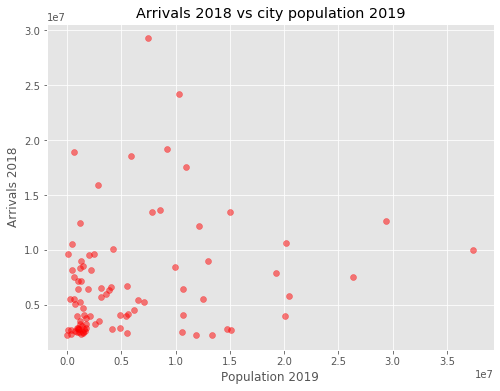

In [198]:
plt.figure(figsize=(8,6))

x = df02['Population2019']
y = df02['Arrivals2018']

plt.scatter(x,y, alpha=0.5, c='r')
plt.title('Arrivals 2018 vs city population 2019')
plt.xlabel('Population 2019')
plt.ylabel('Arrivals 2018')


Let's look at some correlation between number of venues in each category and arrivals

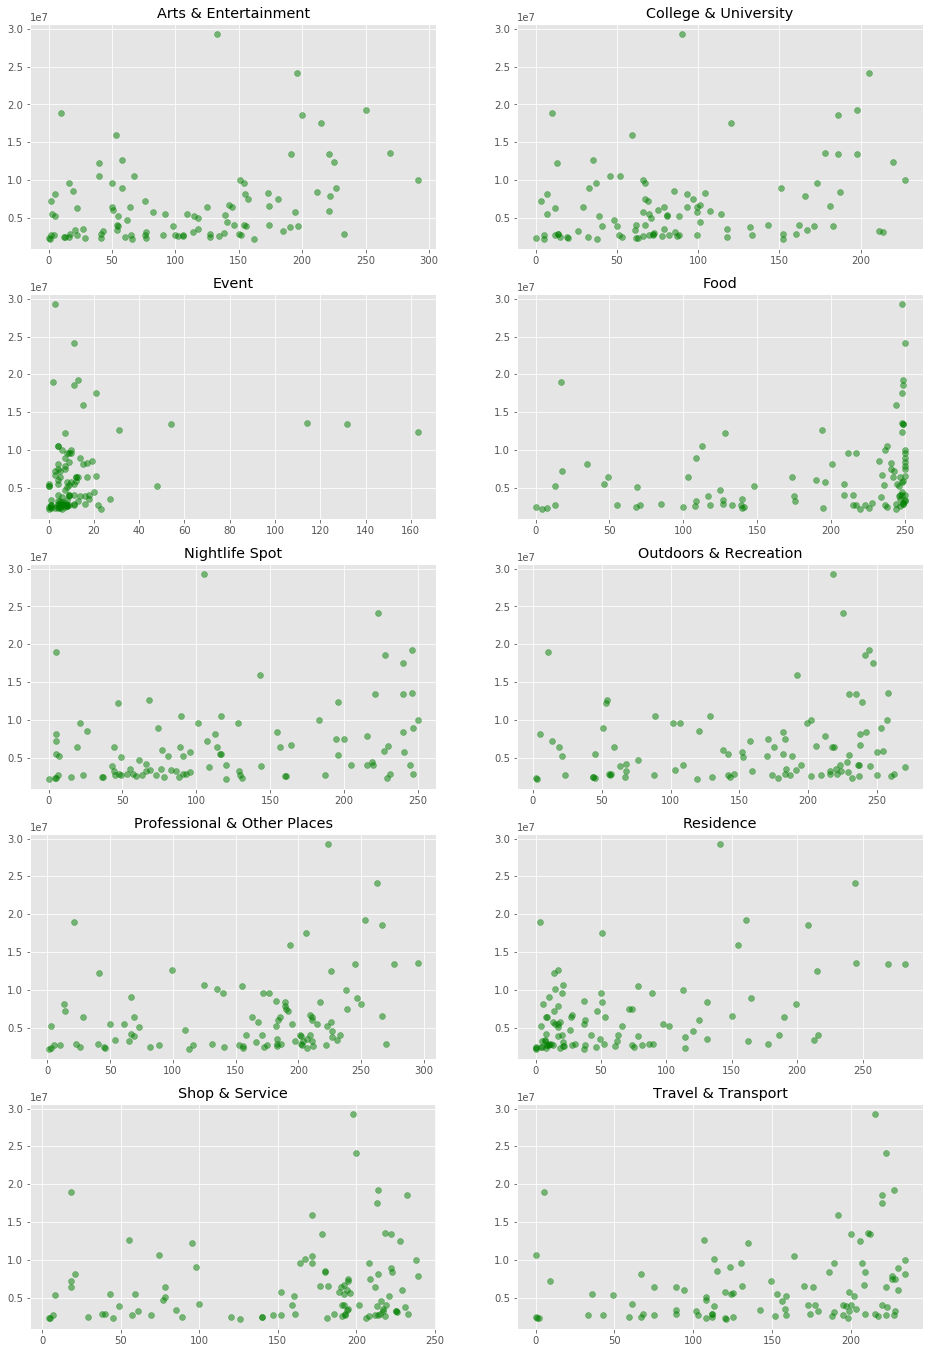

In [199]:
fig, axs = plt.subplots(figsize=(16,24),nrows=5,ncols=2)

rows =[0,0,1,1,2,2,3,3,4,4]
cols = [0,1,0,1,0,1,0,1,0,1]

for cat, i, j in zip(df_categories['name'].unique(), rows, cols):
    df_plot = df07[['City',cat]]
    df_plot = pd.merge(df_plot, df, on='City')
    df_plot.drop(['Country','GPS_location'], axis=1, inplace=True)
    x = df_plot[cat]
    y = df_plot['Arrivals2018']
    axs[i,j].scatter(x, y, alpha=0.5, c='g')
    axs[i,j].set_title(cat)

plt.savefig('Fig91.png')
    


Let's look at some correlation between number of venues in each category and population

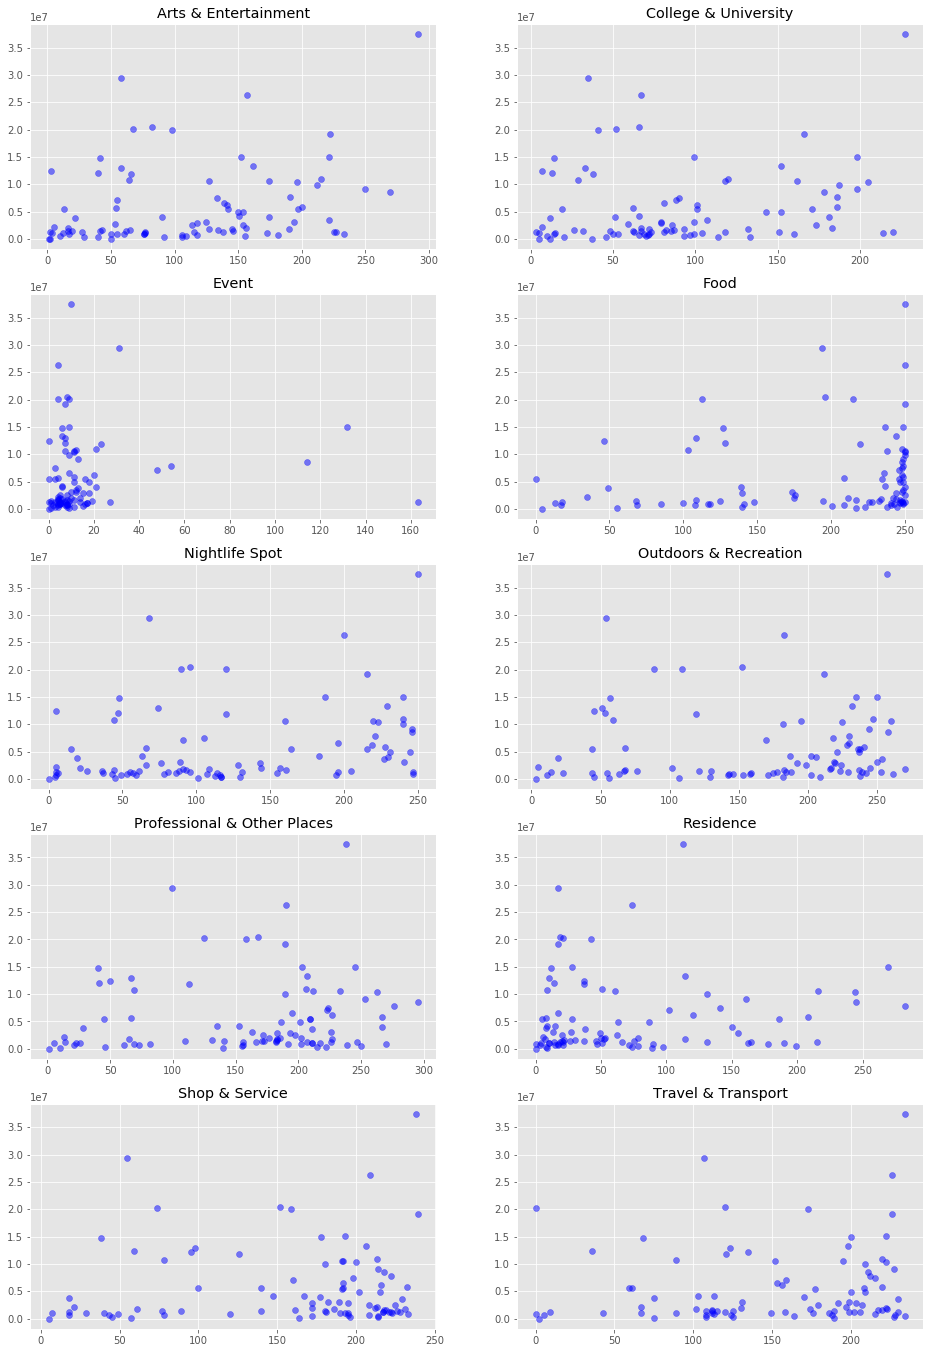

In [200]:
fig, axs = plt.subplots(figsize=(16,24),nrows=5,ncols=2)

rows =[0,0,1,1,2,2,3,3,4,4]
cols = [0,1,0,1,0,1,0,1,0,1]

for cat, i, j in zip(df_categories['name'].unique(), rows, cols):
    df_plot = df07[['City',cat]]
    df_plot = pd.merge(df_plot, df, on='City')
    df_plot.drop(['Country','GPS_location'], axis=1, inplace=True)
    x = df_plot[cat]
    y = df_plot['Population2019']
    axs[i,j].scatter(x, y, alpha=0.5, c='b')
    axs[i,j].set_title(cat)
    #m, b = np.polyfit(x, y, 1)
    #axs[i,j].plot(x, m*x + b, c='b')
    
plt.savefig('Fig92.png')

Let's look at cities on the venue numbers but weighted by the arrivals (histogram for top10 by category)

In [201]:
venue_weighted = pd.merge(df07,df, on='City')

for col in venue_weighted.columns[1:11]:
    venue_weighted[col] = venue_weighted[col] / venue_weighted['Arrivals2018']*1000000

venue_weighted.head()

,City,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Country,Arrivals2018,Population2019,GPS_location
0,Abu Dhabi,17.063426,25.803230,1.664724,81.155319,36.623939,54.103546,71.999334,19.144332,58.265357,52.022640,United Arab Emirates,2402800,1452057.0,"Abu Dhabi, United Arab Emirates"
1,Agra,0.614386,0.860141,0.491509,4.300705,0.614386,0.614386,1.597405,0.737264,2.580423,8.232779,India,8138200,2159903.0,"Agra, India"
2,Amsterdam,20.708147,12.448828,2.034905,28.847765,18.553542,28.967465,25.974959,6.104714,26.693160,22.264250,Netherlands,8354200,1140339.0,"Amsterdam, Netherlands"
3,Antalya,18.088562,17.686594,13.104158,19.937615,15.757147,19.214072,18.168955,17.284626,18.329742,16.561083,Turkey,12438800,1219140.0,"Antalya, Turkey"
4,Athens,33.866350,17.282313,1.745688,43.293066,42.071084,43.642204,39.452552,2.269395,32.993506,34.739194,Greece,5728400,3154152.0,"Athens, Greece"


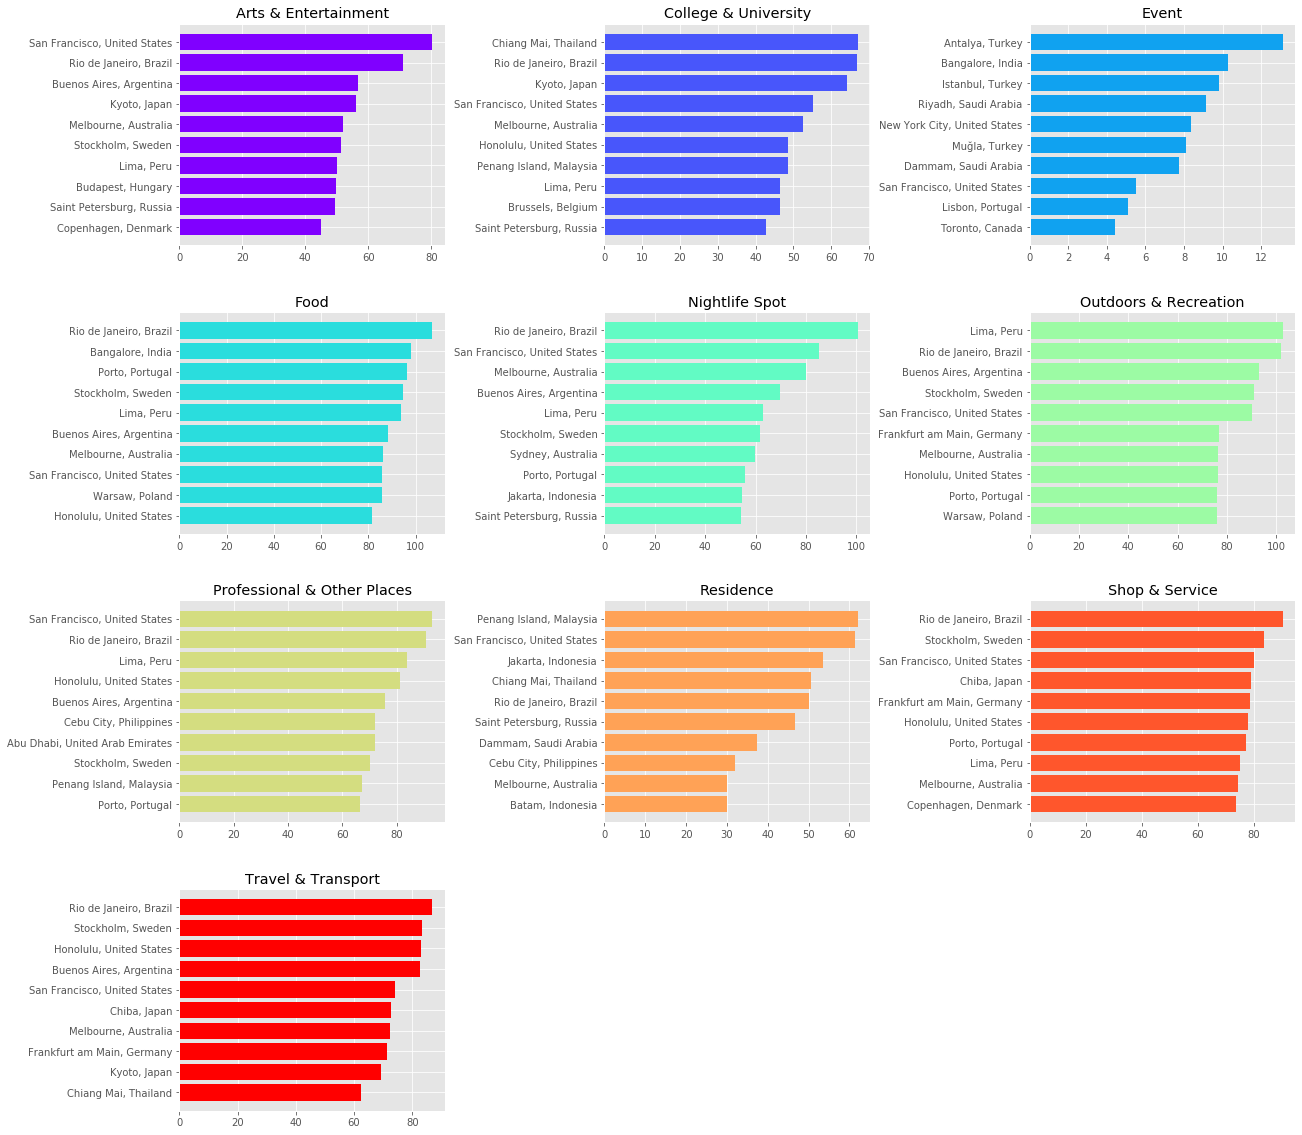

In [202]:
# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

fig, axs = plt.subplots(4,3,figsize=(20,20))
rows=[0,0,0,1,1,1,2,2,2,3]
cols=[0,1,2,0,1,2,0,1,2,0]

for col, i, j, k in zip(venue_weighted.columns[1:11],rows,cols,rainbow):
    cat_plot = venue_weighted[['GPS_location',col]].sort_values(by=col, ascending=False)
    cat_plot = cat_plot.head(10).sort_values(by=col, ascending=True)
    axs[i,j].barh(range(10), cat_plot[col],color=k, height=0.8)
    axs[i,j].set_yticks(range(10))
    axs[i,j].set_yticklabels(cat_plot['GPS_location'])
    axs[i,j].set_title(col)

axs[3,1].axis('off')
axs[3,2].axis('off')
plt.subplots_adjust(wspace=0.6, hspace=0.3)

plt.savefig('Fig93.png')

Let's look at distribution of venues numbers across the top10 FourSquare categories for our top100 cities (Seaborn violin graph)

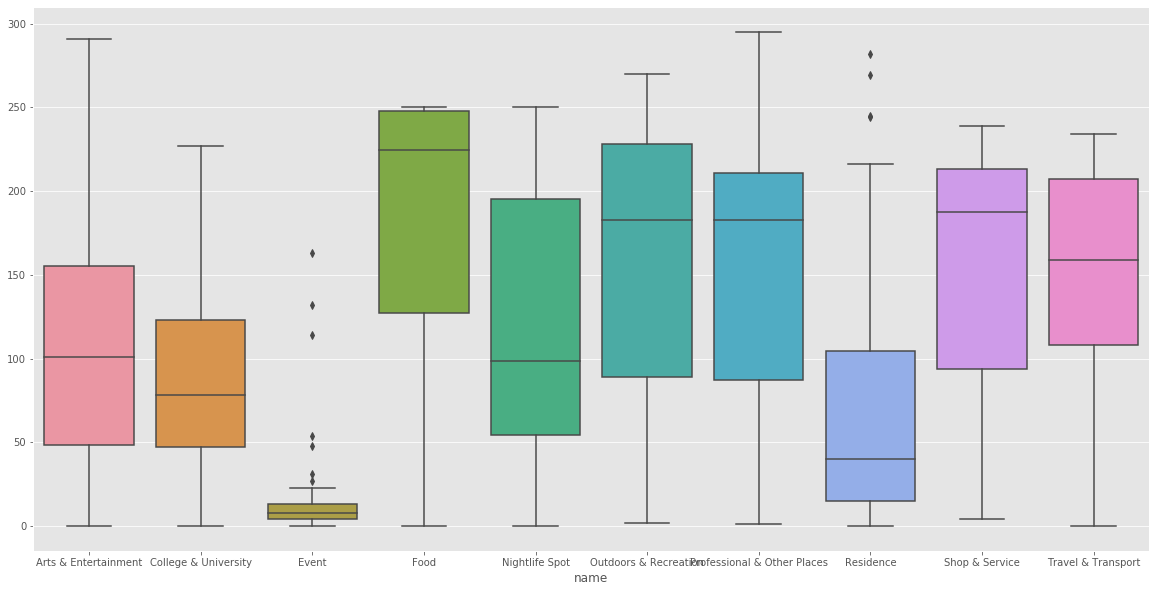

<Figure size 432x288 with 0 Axes>

In [203]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.boxplot(data=df07)
plt.show()

plt.savefig('Fig94.png')

- - -  


# 4. City clustering

In order to compare cities among each other, we normalise the data to sense where each city lies in comparaison to the average by category.  
This information will be helpful later when we compare the cities in the different clusters.

In [205]:
df07_fit = pd.DataFrame(dataSet, columns=df07.columns[1:11])
df07_fit.insert(0, 'City', df07['City'])
df07_fit.head()

name,City,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Abu Dhabi,-0.882951,-0.460541,-0.399697,0.126734,-0.356482,-0.372821,0.217215,-0.325429,-0.212279,-0.410073
1,Agra,-1.375073,-1.382964,-0.399697,-1.992045,-1.436342,-1.960644,-1.830773,-0.887726,-1.890763,-1.328738
2,Amsterdam,0.921500,0.243855,0.151902,0.689127,0.530545,1.049869,0.767611,-0.255142,0.958429,0.556109
3,Antalya,1.632344,2.172558,6.346781,0.819915,1.044764,1.011761,0.895611,2.050274,1.028953,0.857051
4,Athens,1.208572,0.159998,-0.145113,0.819915,1.597549,1.151489,0.908411,-0.789324,0.478862,0.746178


We then use a K-means algorithm to cluster the cities. We set the number of clusters at 5.

In [206]:
# set number of clusters
kclusters = 5

df07_clustering = df07.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df07_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 4, 2, 4, 1, 1, 2, 4, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each city

In [207]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = df02

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(cities_venues_sorted.set_index('City'), on='City')
#cities_merged.drop(['Country','Arrivals2018','Population2019','GPS_location'], axis=1, inplace=True)

cities_merged.head(10) # check the last columns!

,City,Country,Arrivals2018,Population2019,GPS_location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hong Kong,Hong Kong,29262700,7490776.0,"Hong Kong, Hong Kong",22.279328,114.162813,4,Food,Professional & Other Places,Outdoors & Recreation,Travel & Transport,Shop & Service,Residence,Arts & Entertainment,Nightlife Spot,College & University,Event
1,Bangkok,Thailand,24177500,10350204.0,"Bangkok, Thailand",13.754253,100.493087,2,Professional & Other Places,Food,Residence,Outdoors & Recreation,Nightlife Spot,Travel & Transport,College & University,Shop & Service,Arts & Entertainment,Event
2,London,United Kingdom,19233000,9176530.0,"London, United Kingdom",51.507322,-0.127647,2,Professional & Other Places,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Travel & Transport,Shop & Service,College & University,Residence,Event
3,Macau,Macau,18931400,642090.0,"Macau, Macau",-5.113366,-36.634996,0,Professional & Other Places,Shop & Service,Food,Outdoors & Recreation,College & University,Arts & Entertainment,Travel & Transport,Nightlife Spot,Residence,Event
4,Singapore,Singapore,18551200,5868104.0,"Singapore, Singapore",1.357107,103.819499,2,Professional & Other Places,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Travel & Transport,Residence,Arts & Entertainment,College & University,Event
5,Paris,France,17560200,10958187.0,"Paris, France",48.856697,2.351462,4,Food,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Arts & Entertainment,Shop & Service,Professional & Other Places,College & University,Residence,Event
6,Dubai,United Arab Emirates,15920700,2833079.0,"Dubai, United Arab Emirates",25.065700,55.171300,1,Food,Professional & Other Places,Travel & Transport,Outdoors & Recreation,Shop & Service,Residence,Nightlife Spot,College & University,Arts & Entertainment,Event
7,New York City,United States,13600000,8580015.0,"New York City, United States",40.712728,-74.006015,2,Professional & Other Places,Arts & Entertainment,Outdoors & Recreation,Food,Nightlife Spot,Residence,Shop & Service,Travel & Transport,College & University,Event
8,Kuala Lumpur,Malaysia,13434300,7780301.0,"Kuala Lumpur, Malaysia",3.151696,101.694237,2,Residence,Professional & Other Places,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Travel & Transport,Arts & Entertainment,College & University,Event
9,Istanbul,Turkey,13433000,14967667.0,"Istanbul, Turkey",41.076602,29.052495,2,Residence,Food,Professional & Other Places,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,College & University,Shop & Service,Event


Let's explore the event venue category as it appears systematically in the last most common venue. Let's pick Antalya in Turkey as it tops the cities for this category.

In [208]:
city='Antalya'
latitude = df02.loc[df02['City']==city]['Latitude'].values[0]
longitude = df02.loc[df02['City']==city]['Longitude'].values[0]
CatId = '4d4b7105d754a06373d81259' #id for events venue category

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                latitude,
                longitude,
                VERSION, 
                RADIUS,
                LIMIT,
                CatId)

results = requests.get(url).json()

In [209]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,lat,lng
0,Soğuksu mahallesi,36.898201,30.675708
1,Atatürk Kültür Merkezi,36.884870,30.669069
2,Excellency Cafe & Bistro,36.848830,30.761696
3,Şehit Ustteğmen Omer Dikmen Konferans Salonu,36.932175,30.726728
4,Yilmaz Rezidans,36.921461,30.730809
5,Ömer Koç Camii,36.929364,30.718797
6,teomanpaşa yürüyüş yolu,36.918427,30.723296
7,Teomanpaşa Mahallesi Yürüyüş Yolu,36.917766,30.722957
8,Teomanpaşa,36.916853,30.726331
9,Yunus Home,36.938488,30.737196


Finally, let's visualize the resulting clusters

In [210]:
# create map
map_clusters = folium.Map(location=[0,0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['City'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('fig002.html') 
map_clusters

## 4.3 Examination of the clusters created

Now, we should be able to examine each cluster and determine the discriminating venue categories that distinguish each cluster.

Let's first display the cities with their standard deviation from the mean in each category

In [211]:
cities_merged_l = cities_merged[['City','Cluster Labels']]
df07_merged = cities_merged_l.join(df07_fit.set_index('City'), on='City')
df07_merged.head()

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Hong Kong,4,0.374697,0.009057,-0.442128,0.846073,-0.125084,0.745007,0.870011,1.024083,0.605806,1.015442
1,Bangkok,2,1.235912,1.937759,-0.229974,0.846073,1.366151,0.833925,1.382008,2.457939,0.634016,1.126315
2,London,2,1.960426,1.820360,-0.017821,0.832994,1.661827,1.062571,1.215609,1.291174,0.831484,1.205511
3,Macau,0,-1.306723,-1.332650,-0.484558,-2.188229,-1.436342,-1.884429,-1.728374,-0.929898,-1.933078,-2.310760
4,Singapore,2,1.290592,1.619104,-0.060252,0.832994,1.443284,1.037166,1.394808,1.951872,1.085373,1.078798


Then let's look at the total number of venues per city and category

In [212]:
cities_merged_l = cities_merged[['City','Cluster Labels']]
df07_merged_num = cities_merged_l.join(df07.set_index('City'), on='City')
df07_merged_num.head()

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Hong Kong,4,133,90,3,248,105,218,224,141,198,215
1,Bangkok,2,196,205,11,250,223,225,263,244,200,222
2,London,2,250,198,13,249,246,244,253,161,214,227
3,Macau,0,10,10,2,17,5,11,21,3,18,5
4,Singapore,2,200,186,11,249,228,241,267,208,232,220


We can now look at the details of each cluster created.

#### Cluster 1

- by most common venue

In [213]:
cities_merged.loc[cities_merged['Cluster Labels'] == 0, cities_merged.columns[[0] + [1] + list(range(6, cities_merged.shape[1]))]]

,City,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Macau,Macau,-36.634996,0,Professional & Other Places,Shop & Service,Food,Outdoors & Recreation,College & University,Arts & Entertainment,Travel & Transport,Nightlife Spot,Residence,Event
25,Agra,India,78.009816,0,Travel & Transport,Food,Shop & Service,Professional & Other Places,College & University,Residence,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Event
30,Ho Chi Minh City,Vietnam,106.761979,0,Shop & Service,Food,Residence,Professional & Other Places,Outdoors & Recreation,Travel & Transport,Nightlife Spot,Event,College & University,Arts & Entertainment
38,Jaipur,India,75.820349,0,Travel & Transport,Food,Professional & Other Places,Arts & Entertainment,Outdoors & Recreation,Nightlife Spot,Shop & Service,Event,College & University,Residence
44,Moscow,Russia,37.327330,0,Shop & Service,Professional & Other Places,Food,Outdoors & Recreation,Residence,Travel & Transport,College & University,Nightlife Spot,Arts & Entertainment,Event
47,Ha Long,Vietnam,107.080000,0,Travel & Transport,College & University,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Arts & Entertainment,Residence,Professional & Other Places,Event
74,Marrakesh,Morocco,-7.989161,0,Travel & Transport,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Professional & Other Places,Arts & Entertainment,College & University,Residence,Event
79,Guilin,China,110.291804,0,Travel & Transport,Outdoors & Recreation,Food,Residence,Shop & Service,Nightlife Spot,Professional & Other Places,College & University,Arts & Entertainment,Event
81,Hurghada,Egypt,33.830706,0,Travel & Transport,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,College & University,Professional & Other Places,Residence,Arts & Entertainment,Event
89,Da Nang,Vietnam,108.212000,0,Food,Travel & Transport,Outdoors & Recreation,Nightlife Spot,Shop & Service,Professional & Other Places,College & University,Arts & Entertainment,Event,Residence


- by number of venues

In [214]:
df07_merged_num[df07_merged_num['Cluster Labels'] == 0]


,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
3,Macau,0,10,10,2,17,5,11,21,3,18,5
25,Agra,0,5,7,4,35,5,5,13,6,21,67
30,Ho Chi Minh City,0,2,3,3,18,5,14,14,14,18,9
38,Jaipur,0,22,12,13,49,19,19,28,8,18,75
44,Moscow,0,3,7,0,46,5,45,50,37,59,36
47,Ha Long,0,5,39,0,13,7,21,3,4,8,49
74,Marrakesh,0,17,14,5,85,57,55,23,10,40,89
79,Guilin,0,4,5,1,13,6,23,5,10,7,43
81,Hurghada,0,2,12,1,55,45,56,10,9,57,75
89,Da Nang,0,12,15,5,100,37,44,26,4,29,67


#### Cluster 2

- by most common venue

In [215]:
cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[[0] + [1] + list(range(6, cities_merged.shape[1]))]]

,City,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Dubai,United Arab Emirates,55.171300,1,Food,Professional & Other Places,Travel & Transport,Outdoors & Recreation,Shop & Service,Residence,Nightlife Spot,College & University,Arts & Entertainment,Event
14,Phuket,Thailand,98.352929,1,Food,Shop & Service,Travel & Transport,Professional & Other Places,Outdoors & Recreation,Nightlife Spot,Residence,College & University,Arts & Entertainment,Event
17,Pattaya,Thailand,100.900953,1,Food,Travel & Transport,Shop & Service,Professional & Other Places,Outdoors & Recreation,Nightlife Spot,Residence,Arts & Entertainment,College & University,Event
19,Mecca,Saudi Arabia,39.826869,1,Food,Professional & Other Places,Shop & Service,Travel & Transport,Outdoors & Recreation,College & University,Residence,Nightlife Spot,Arts & Entertainment,Event
22,Medina,Saudi Arabia,39.611122,1,Food,Professional & Other Places,Shop & Service,Outdoors & Recreation,Travel & Transport,College & University,Residence,Nightlife Spot,Event,Arts & Entertainment
31,Denpasar,Indonesia,115.219118,1,Food,Shop & Service,Professional & Other Places,Outdoors & Recreation,Travel & Transport,Nightlife Spot,Arts & Entertainment,College & University,Residence,Event
34,Milan,Italy,9.190500,1,Outdoors & Recreation,Shop & Service,Food,Professional & Other Places,Travel & Transport,Arts & Entertainment,Nightlife Spot,College & University,Residence,Event
37,Johor Bahru,Malaysia,103.755084,1,Food,Professional & Other Places,Shop & Service,Residence,Travel & Transport,Outdoors & Recreation,Nightlife Spot,College & University,Arts & Entertainment,Event
39,Cancún,Mexico,-86.851047,1,Shop & Service,Food,Professional & Other Places,Outdoors & Recreation,Residence,Travel & Transport,Nightlife Spot,College & University,Arts & Entertainment,Event
41,Cairo,Egypt,31.243666,1,Food,Professional & Other Places,Shop & Service,Outdoors & Recreation,Travel & Transport,Nightlife Spot,Arts & Entertainment,College & University,Residence,Event


- by number of venues

In [216]:
df07_merged_num[df07_merged_num['Cluster Labels'] == 1]

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
6,Dubai,1,53,59,15,244,143,192,193,155,172,192
14,Phuket,1,40,46,4,238,117,129,155,78,172,164
17,Pattaya,1,50,37,9,217,101,107,140,89,164,189
19,Mecca,1,16,67,10,212,21,102,177,50,172,130
22,Medina,1,19,85,19,233,26,121,182,37,180,115
31,Denpasar,1,76,69,5,243,107,158,192,47,195,149
34,Milan,1,125,79,12,174,89,219,163,27,182,131
37,Johor Bahru,1,50,99,17,247,114,175,211,190,190,176
39,Cancún,1,51,75,4,190,77,138,184,125,194,94
41,Cairo,1,82,66,8,196,96,152,168,19,152,120


#### Cluster 3

- by most common venue

In [217]:
cities_merged.loc[cities_merged['Cluster Labels'] == 2, cities_merged.columns[[0] + [1] + list(range(6, cities_merged.shape[1]))]]

,City,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bangkok,Thailand,100.493087,2,Professional & Other Places,Food,Residence,Outdoors & Recreation,Nightlife Spot,Travel & Transport,College & University,Shop & Service,Arts & Entertainment,Event
2,London,United Kingdom,-0.127647,2,Professional & Other Places,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Travel & Transport,Shop & Service,College & University,Residence,Event
4,Singapore,Singapore,103.819499,2,Professional & Other Places,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Travel & Transport,Residence,Arts & Entertainment,College & University,Event
7,New York City,United States,-74.006015,2,Professional & Other Places,Arts & Entertainment,Outdoors & Recreation,Food,Nightlife Spot,Residence,Shop & Service,Travel & Transport,College & University,Event
8,Kuala Lumpur,Malaysia,101.694237,2,Residence,Professional & Other Places,Food,Outdoors & Recreation,Shop & Service,Nightlife Spot,Travel & Transport,Arts & Entertainment,College & University,Event
9,Istanbul,Turkey,29.052495,2,Residence,Food,Professional & Other Places,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,College & University,Shop & Service,Event
11,Antalya,Turkey,30.727687,2,Food,Outdoors & Recreation,Shop & Service,Professional & Other Places,Arts & Entertainment,College & University,Residence,Travel & Transport,Nightlife Spot,Event
16,Tokyo,Japan,139.759455,2,Arts & Entertainment,Outdoors & Recreation,Nightlife Spot,Food,Shop & Service,Professional & Other Places,Travel & Transport,College & University,Residence,Event
21,Prague,Czech Republic,14.421254,2,Outdoors & Recreation,Food,Professional & Other Places,Nightlife Spot,Travel & Transport,Arts & Entertainment,Shop & Service,Residence,College & University,Event
23,Seoul,South Korea,126.978291,2,Food,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places,College & University,Outdoors & Recreation,Shop & Service,Residence,Event


- by number of venues

In [218]:
df07_merged_num[df07_merged_num['Cluster Labels'] == 2]

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
1,Bangkok,2,196,205,11,250,223,225,263,244,200,222
2,London,2,250,198,13,249,246,244,253,161,214,227
4,Singapore,2,200,186,11,249,228,241,267,208,232,220
7,New York City,2,269,178,114,248,246,258,295,245,218,211
8,Kuala Lumpur,2,191,186,54,249,221,230,276,282,222,212
9,Istanbul,2,221,198,132,249,240,235,245,269,178,200
11,Antalya,2,225,220,163,248,196,239,226,215,228,206
16,Tokyo,2,291,227,10,250,250,257,238,113,238,234
21,Prague,2,227,151,14,250,247,253,247,165,222,230
23,Seoul,2,212,187,9,250,240,182,189,131,180,209


#### Cluster 4

- by most common venue

In [219]:
cities_merged.loc[cities_merged['Cluster Labels'] == 3, cities_merged.columns[[0] + [1] + list(range(6, cities_merged.shape[1]))]]

,City,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Delhi,India,77.221939,3,Food,Travel & Transport,Professional & Other Places,Nightlife Spot,Arts & Entertainment,Shop & Service,Outdoors & Recreation,College & University,Event,Residence
12,Shenzhen,China,114.054330,3,Travel & Transport,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Professional & Other Places,Arts & Entertainment,Residence,College & University,Event
13,Mumbai,India,72.835335,3,Professional & Other Places,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Arts & Entertainment,College & University,Residence,Event,Travel & Transport
20,Guangzhou,China,113.259295,3,Travel & Transport,Food,Shop & Service,Nightlife Spot,Professional & Other Places,Arts & Entertainment,Outdoors & Recreation,College & University,Residence,Event
35,Chennai,India,80.283833,3,Food,Travel & Transport,Shop & Service,Professional & Other Places,Arts & Entertainment,Outdoors & Recreation,Nightlife Spot,College & University,Event,Residence
45,Venice,Italy,12.334590,3,Food,Outdoors & Recreation,Travel & Transport,Nightlife Spot,Arts & Entertainment,College & University,Professional & Other Places,Shop & Service,Residence,Event
50,Florence,Italy,11.255576,3,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Shop & Service,Professional & Other Places,College & University,Food,Nightlife Spot,Residence,Event
51,Hanoi,Vietnam,105.854444,3,Food,Professional & Other Places,Travel & Transport,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot,College & University,Residence,Event
53,Johannesburg,South Africa,28.049722,3,Food,Shop & Service,Outdoors & Recreation,Professional & Other Places,Nightlife Spot,College & University,Travel & Transport,Arts & Entertainment,Residence,Event
60,Jerusalem,Israel,35.225079,3,Food,Travel & Transport,Professional & Other Places,Outdoors & Recreation,Arts & Entertainment,College & University,Shop & Service,Nightlife Spot,Residence,Event


- by number of venues

In [220]:
df07_merged_num[df07_merged_num['Cluster Labels'] == 3]

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
10,Delhi,3,58,35,31,194,68,54,99,17,55,107
12,Shenzhen,3,40,13,7,128,47,53,41,14,95,135
13,Mumbai,3,67,52,4,113,90,89,125,21,74,0
20,Guangzhou,3,58,33,7,109,74,51,67,10,98,123
35,Chennai,3,64,29,12,103,44,59,69,9,78,89
45,Venice,3,109,70,4,209,116,142,61,15,43,124
50,Florence,3,118,71,8,69,49,153,73,17,78,108
51,Hanoi,3,62,48,7,125,61,76,110,26,77,108
53,Johannesburg,3,54,62,4,209,66,68,67,8,100,61
60,Jerusalem,3,55,50,9,117,43,63,69,17,49,113


#### Cluster 5

- by most common venue

In [221]:
cities_merged.loc[cities_merged['Cluster Labels'] == 4, cities_merged.columns[[0] + [1] + list(range(6, cities_merged.shape[1]))]]



,City,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hong Kong,Hong Kong,114.162813,4,Food,Professional & Other Places,Outdoors & Recreation,Travel & Transport,Shop & Service,Residence,Arts & Entertainment,Nightlife Spot,College & University,Event
5,Paris,France,2.351462,4,Food,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Arts & Entertainment,Shop & Service,Professional & Other Places,College & University,Residence,Event
15,Rome,Italy,12.482932,4,Food,Outdoors & Recreation,Nightlife Spot,Shop & Service,Arts & Entertainment,Professional & Other Places,Travel & Transport,College & University,Residence,Event
18,Taipei,Taiwan,121.563680,4,Food,Shop & Service,Travel & Transport,Outdoors & Recreation,College & University,Professional & Other Places,Arts & Entertainment,Nightlife Spot,Residence,Event
24,Amsterdam,Netherlands,4.893604,4,Outdoors & Recreation,Food,Shop & Service,Professional & Other Places,Travel & Transport,Arts & Entertainment,Nightlife Spot,College & University,Residence,Event
27,Osaka,Japan,135.490357,4,Food,Shop & Service,Travel & Transport,Arts & Entertainment,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,College & University,Residence,Event
28,Las Vegas,United States,-115.148516,4,Food,Professional & Other Places,Travel & Transport,Shop & Service,Nightlife Spot,Arts & Entertainment,Outdoors & Recreation,College & University,Residence,Event
29,Shanghai,China,121.469207,4,Food,Travel & Transport,Shop & Service,Nightlife Spot,Professional & Other Places,Outdoors & Recreation,Arts & Entertainment,Residence,College & University,Event
32,Barcelona,Spain,2.177432,4,Outdoors & Recreation,Food,Professional & Other Places,Travel & Transport,Shop & Service,Nightlife Spot,Arts & Entertainment,College & University,Residence,Event
36,Vienna,Austria,16.372504,4,Food,Travel & Transport,Outdoors & Recreation,Shop & Service,Professional & Other Places,Nightlife Spot,Arts & Entertainment,College & University,Residence,Event


- by number of venues

In [222]:
df07_merged_num[df07_merged_num['Cluster Labels'] == 4]

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Hong Kong,4,133,90,3,248,105,218,224,141,198,215
5,Paris,4,215,120,21,248,240,247,206,51,213,220
15,Rome,4,151,66,6,237,183,202,135,15,167,113
18,Taipei,4,154,173,8,250,128,199,172,20,208,207
24,Amsterdam,4,173,104,17,241,155,242,217,51,223,186
27,Osaka,4,222,166,7,250,216,212,189,17,239,226
28,Las Vegas,4,181,97,7,241,195,171,239,71,195,228
29,Shanghai,4,157,67,4,250,200,183,190,74,209,226
32,Barcelona,4,142,101,3,235,164,238,209,28,192,208
36,Vienna,4,145,93,5,242,157,217,185,53,212,222


## 4.4 Further cluster analysis

We can also plot the mean deviation for each cluster and each category to see  how the k-means clustering worked the clusters

In [223]:
range(kclusters)

range(0, 5)

In [224]:
df07_merged.head()

,City,Cluster Labels,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Hong Kong,4,0.374697,0.009057,-0.442128,0.846073,-0.125084,0.745007,0.870011,1.024083,0.605806,1.015442
1,Bangkok,2,1.235912,1.937759,-0.229974,0.846073,1.366151,0.833925,1.382008,2.457939,0.634016,1.126315
2,London,2,1.960426,1.820360,-0.017821,0.832994,1.661827,1.062571,1.215609,1.291174,0.831484,1.205511
3,Macau,0,-1.306723,-1.332650,-0.484558,-2.188229,-1.436342,-1.884429,-1.728374,-0.929898,-1.933078,-2.310760
4,Singapore,2,1.290592,1.619104,-0.060252,0.832994,1.443284,1.037166,1.394808,1.951872,1.085373,1.078798


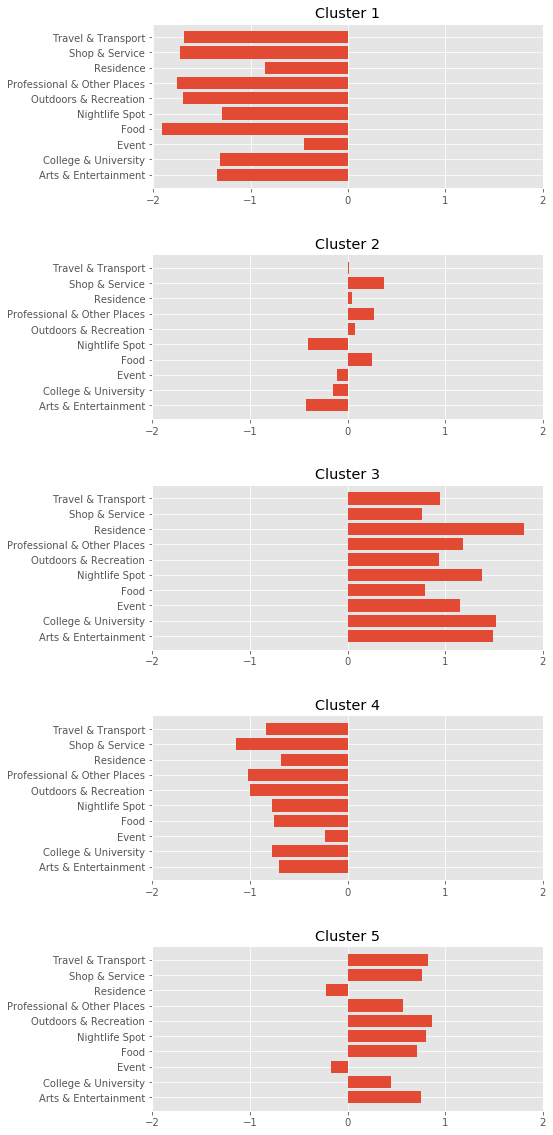

In [225]:
fig, axs = plt.subplots(figsize=(7,kclusters*4),nrows=kclusters,ncols=1)
mean_list=[]
std_max = 2

# Loop
for i in range(kclusters):
    mean_list=[]
    cluster = df07_merged[df07_merged['Cluster Labels'] == i]
    cluster = cluster.drop('Cluster Labels', 1)
    for col in cluster.columns[1:]:
        mean_list.append(cluster[col].mean())    
    axs[i].barh(range(10), mean_list)
    axs[i].set_xticks(np.linspace(-std_max, std_max, std_max*2+1))
    axs[i].set_yticks(range(10))
    axs[i].set_yticklabels(cluster.columns[1:])
    axs[i].set_title('Cluster '+str(i+1))

plt.subplots_adjust(wspace=2, hspace=0.4)
plt.savefig('fig94.png', dpi=300)

Last edited on 22 April 2020  
by Fabrice PETITFRERE  
For Coursera IBM Capstone projet  